In [1]:
%matplotlib inline

from ngramkit.common.w2v_model import W2VModel
from ngramkit.ngram_analyze.cosine_similarity_time_series import cosine_similarity_over_years, plot_nearest_neighbors
from ngramkit.ngram_analyze.weat_time_series import compute_weat_over_years
from ngramkit.ngram_analyze.semantic_drift import track_yearly_drift, compute_similarity_to_previous_year
from ngramkit.ngram_analyze.average_relatedness_by_year import track_word_semantic_drift

# **Analyze Semantic Change**
## **Goal**: Use trained `Word2vec` embeddings to examine semantic change over time.

The `ngram-kit` package contains several tools useful in quantifying how much word meanings have changed over the years. Before using these tools, it helps to set a model path variable. Most commonly, this will point to the `norm_and_align` directory. We'll also set a `corpus_path` variable pointing to the yearly corpus data.

In [5]:
model_path =  '/scratch/edk202/NLP_models/Google_Books/20200217/eng/5gram_files/models_final/norm_and_align'

### `compare_words_cosim` method

Let's say we want to measure the relationship between three pairs of words — _horse_ and _donkey_, _horse_ and _lizard_ , and _horse_ and _amoeba_ — in the 2019 corpus. We first create a `W2VModel` instance for the 2019 embeddings. Then, we call the `compare_words_cosim` method for our words.

In [6]:
year = 2019
model = W2VModel(f'{model_path}/w2v_y{year}_wbnone_vs300_w004_mc001_sg1_e010.kv')

word1, word2 = 'horse', 'mare'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'deer'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'ivy'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'atom'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

cos(Φ) of 'horse' and 'mare' in 2019 = 0.6283
cos(Φ) of 'horse' and 'deer' in 2019 = 0.4950
cos(Φ) of 'horse' and 'ivy' in 2019 = 0.1864
cos(Φ) of 'horse' and 'atom' in 2019 = 0.1465


The results are about what you'd expect!

### `compare_models_cosim` method
Suppose we want to compare the semantic similarity of the _same_ words across _models_. We can use the `compare_models_cosim` method to compute the average cosine similarity between shared words in two models. Or, if we specify the `word` parameter, we can compute similarity for a single word across the models.

In [8]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs300_w004_mc001_sg1_e010.kv')
reference_model = W2VModel(f'{model_path}/w2v_y2018_wbnone_vs300_w004_mc001_sg1_e010.kv')

cosim_mean, cosim_sd, shared_words = model.compare_models_cosim(reference_model)
print(f"Overall similarity between models:\n  cos(Φ) mean = {cosim_mean:.4f}\n  cos(Φ) SD = {cosim_sd:.4f}\n  shared words: {shared_words}\n")

word = 'horse'
cosim, _, _ = model.compare_models_cosim(reference_model, word)
print(f"Similarity of \'{word}\' between models:\n  cos(Φ) = {cosim:.4f}\n")

Overall similarity between models:
  cos(Φ) mean = 0.8658
  cos(Φ) SD = 0.0544
  shared words: 15002

Similarity of 'horse' between models:
  cos(Φ) = 0.9275



### `track_yearly_drift` function

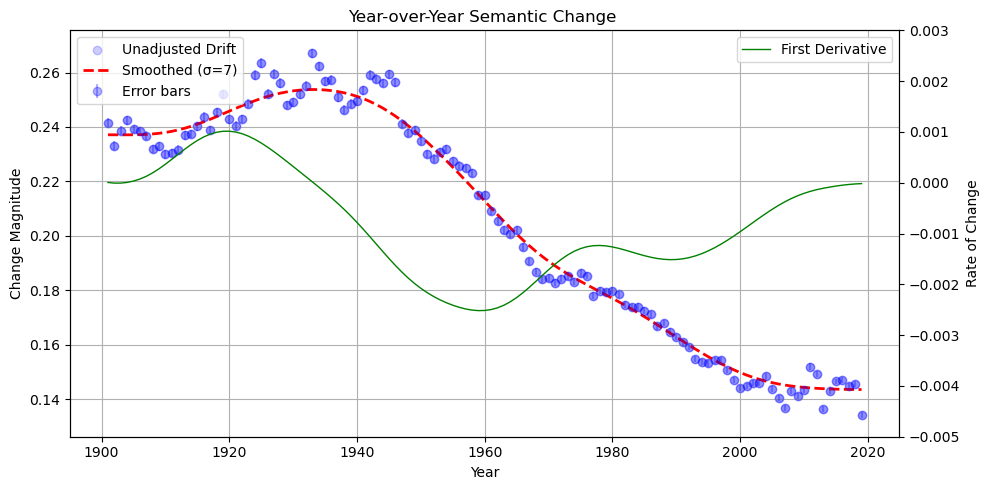

In [9]:
drift_scores = track_yearly_drift(
    start_year=1900,
    end_year=2019,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=7,
    confidence=0.99
)

### `mean_cosine_similarity_to_all` class

In [10]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs300_w004_mc001_sg1_e010.kv')

mean_sim = model.mean_cosine_similarity_to_all('person', '')
print(f"Mean cosine similarity = {mean_sim:.4f}")

Mean cosine similarity = 0.1359


Tracking semantic drift for word: 'gay' (Excluding: 0 words)


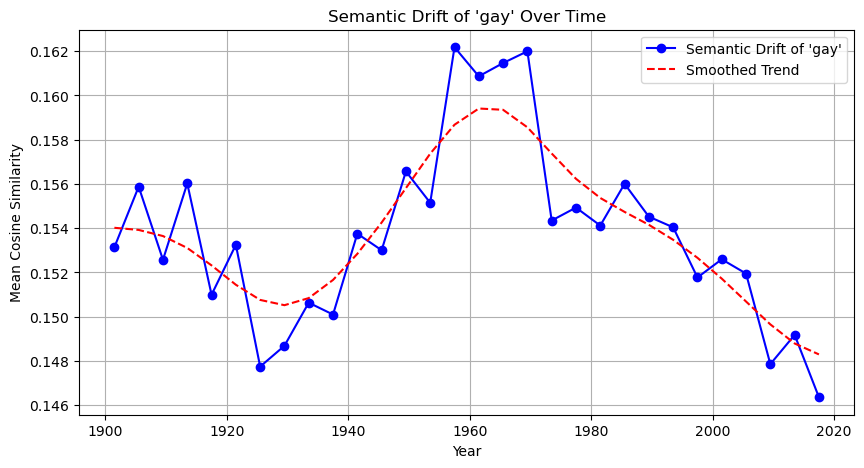

{1900: (0.1507445187391794, 0),
 1901: (0.15349701641077296, 0),
 1902: (0.15428879769801793, 0),
 1903: (0.15401967890049292, 0),
 1904: (0.15856131447770366, 0),
 1905: (0.15488421062764074, 0),
 1906: (0.15612978206815947, 0),
 1907: (0.15392302471151662, 0),
 1908: (0.15167203115045605, 0),
 1909: (0.1537993769160341, 0),
 1910: (0.1536912462311178, 0),
 1911: (0.15112179949677418, 0),
 1912: (0.15692290224743138, 0),
 1913: (0.1571097770401648, 0),
 1914: (0.15464950637452968, 0),
 1915: (0.15540496486861322, 0),
 1916: (0.1478360856719556, 0),
 1917: (0.15100833178579812, 0),
 1918: (0.15255923099885974, 0),
 1919: (0.15255977143044563, 0),
 1920: (0.15347139046343503, 0),
 1921: (0.1547240640925627, 0),
 1922: (0.15294997433080426, 0),
 1923: (0.15184759861638153, 0),
 1924: (0.14204206975986508, 0),
 1925: (0.14632016801019282, 0),
 1926: (0.150544612641331, 0),
 1927: (0.1520603133407007, 0),
 1928: (0.14846293547495842, 0),
 1929: (0.14933050707880358, 0),
 1930: (0.149441203

In [11]:
track_word_semantic_drift(
    word='gay',
    start_year=1900,
    end_year=2019,
    model_dir=f'{model_path}',
    plot=4,
    smooth=True,
    sigma=2
)

### `cosine_similarity_over_years` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.

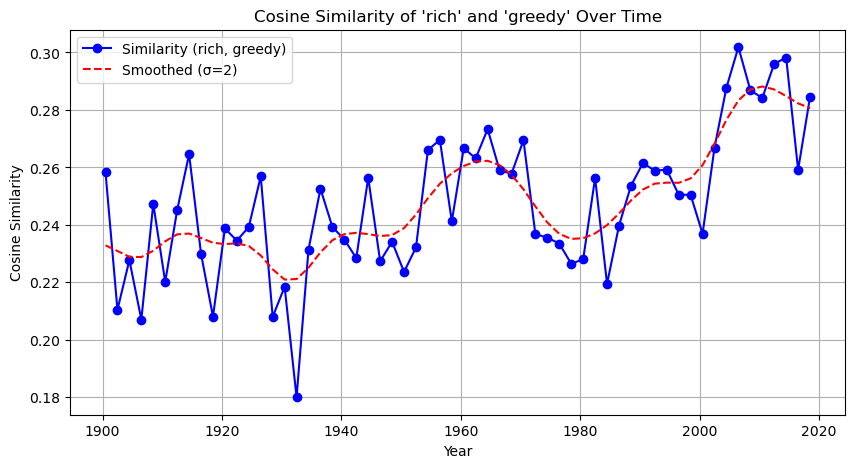

{1900: 0.2708867,
 1901: 0.24579868,
 1902: 0.17609993,
 1903: 0.24478345,
 1904: 0.17535843,
 1905: 0.28012058,
 1906: 0.23124978,
 1907: 0.18283854,
 1908: 0.24472795,
 1909: 0.249878,
 1910: 0.22042553,
 1911: 0.21988495,
 1912: 0.2464457,
 1913: 0.24376497,
 1914: 0.3015628,
 1915: 0.22765644,
 1916: 0.22571081,
 1917: 0.23410921,
 1918: 0.18603782,
 1919: 0.2301159,
 1920: 0.19752486,
 1921: 0.2799625,
 1922: 0.2336829,
 1923: 0.23532435,
 1924: 0.22941028,
 1925: 0.24918641,
 1926: 0.23297091,
 1927: 0.28083208,
 1928: 0.210447,
 1929: 0.20553829,
 1930: 0.22801054,
 1931: 0.2088879,
 1932: 0.1884924,
 1933: 0.17155506,
 1934: 0.2008576,
 1935: 0.26199374,
 1936: 0.28049254,
 1937: 0.22466134,
 1938: 0.25393447,
 1939: 0.22461988,
 1940: 0.22855033,
 1941: 0.24124078,
 1942: 0.21348874,
 1943: 0.24338597,
 1944: 0.24394265,
 1945: 0.26884967,
 1946: 0.22683863,
 1947: 0.22782852,
 1948: 0.21332163,
 1949: 0.25492436,
 1950: 0.18858202,
 1951: 0.25863838,
 1952: 0.23923083,
 1953:

In [74]:
cosine_similarity_over_years(
    word1='rich',
    word2='greedy',
    start_year=1900,
    end_year=2019,
    model_dir=f'{model_path}',
    plot=2,
    smooth=True,
    sigma=2
)

### `compute_weat` method
This method runs a Word Embedding Association Test (WEAT) as described in [Caliskan, Bryson, and Narayanan, 2017](https://www.science.org/doi/10.1126/science.aal4230). The WEAT is a close analog of the Implicit Association Test (IAT; [Greenwald, McGhee, & Schwarz, 1995](https://psycnet.apa.org/record/1998-02892-004))—but, whereas the IAT uses reaction latencies to measure a person's cognitive association between two mental category constrasts, the WEAT uses cosine similarities to measure the semantic association between linguistic category contrasts in a corpus.

Just as with the IAT, the WEAT requires that you select two constrasting "target" categories (e.g., _man_ vs. _woman_) and two contrasting "attribute" categories (e.g., _science_ vs. _art_), as well as a list of exemplars of each of these four categories. The `compute_weat` method then:
1. calculates the mean of all pairwise cosine similarities among exemplars within each target–attribute combination (e.g., $\bar c_{man, science}$, $\bar c_{man, art}$, $\bar c_{woman, science}$, $\bar c_{woman, art}$),
2. takes the difference in mean similarity between combinations involving the same target (e.g., $\bar c_{man, science} - \bar c_{man, art}$ and $\bar c_{woman, science} - \bar c_{woman, art}$),
3. subtracts these differences from one another (e.g., $[(\bar c_{man, science} - \bar c_{man, art}) - (\bar c_{woman, science} - \bar c_{woman, art})]$), and
4. divides this difference by the pooled standard deviation across all exemplars for all target–attribute pairs.

This calculation yields an effect size, $d$, analogous to that used in IAT research. Higher scores indicate a stronger relative semantic link between the first target and first attribute (e.g., between _man_ and _science_).

In [75]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs300_w004_mc001_sg1_e010.kv')

target1 = ["poor", "poverty"]
target2 = ["rich", "wealthy"]
attribute1 = ["happy", "joy"]
attribute2 = ["unhappy", "miserable"]

weat_score, p = model.compute_weat(
    target1,
    target2,
    attribute1,
    attribute2,
    num_permutations=1_000
)

print(f"WEAT effect size (Cohen's d) = {weat_score:.4f}, p = {p:.4f}")

WEAT effect size (Cohen's d) = -0.9792, p = 0.6790


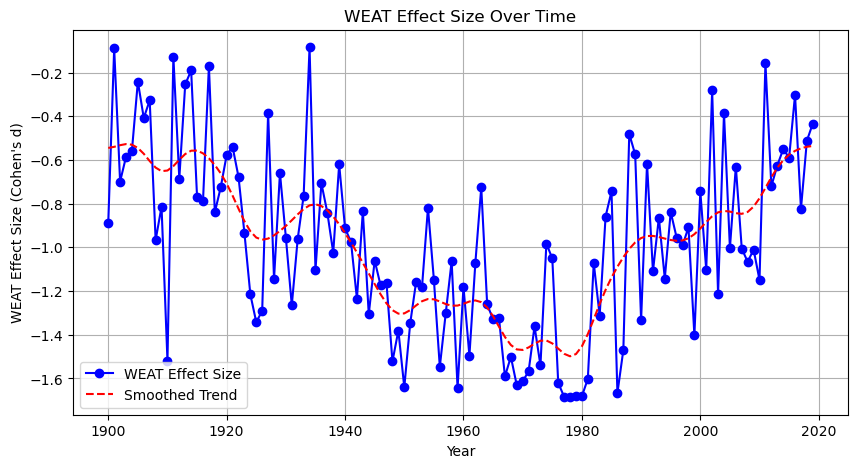

{1900: (-0.8883449, None, None),
 1901: (-0.089640394, None, None),
 1902: (-0.69915354, None, None),
 1903: (-0.5855851, None, None),
 1904: (-0.55673987, None, None),
 1905: (-0.24113302, None, None),
 1906: (-0.40777418, None, None),
 1907: (-0.32682008, None, None),
 1908: (-0.96688163, None, None),
 1909: (-0.8138103, None, None),
 1910: (-1.5183856, None, None),
 1911: (-0.12790293, None, None),
 1912: (-0.68477064, None, None),
 1913: (-0.254044, None, None),
 1914: (-0.19024606, None, None),
 1915: (-0.7690846, None, None),
 1916: (-0.78968805, None, None),
 1917: (-0.1702939, None, None),
 1918: (-0.83983195, None, None),
 1919: (-0.7245531, None, None),
 1920: (-0.57686317, None, None),
 1921: (-0.53974193, None, None),
 1922: (-0.6772358, None, None),
 1923: (-0.9344238, None, None),
 1924: (-1.2154121, None, None),
 1925: (-1.3424466, None, None),
 1926: (-1.2903562, None, None),
 1927: (-0.38499272, None, None),
 1928: (-1.1455439, None, None),
 1929: (-0.6589647, None, No

In [234]:
target1 = ["worker", "poor"]
target2 = ["upper-class", "rich", "owner"]
attribute1 = ["honesty", "generosity", "happy", "joyful", "kind", "loyal"]
attribute2 = ["dishonesty", "selfish", "unhappy", "miserable", "resent", "angry"]

compute_weat_over_years(
    target1,
    target2,
    attribute1,
    attribute2,
    start_year=1900,
    end_year=2019,
    model_dir=f"{model_path}",
    num_permutations=0,
    plot=1,
    smooth=True,
    sigma=3,
    return_std=False
)

|### `plot_nearest_neighbors` function

This function plots the N nearest neighbors to a target word for a specific year, showing their cosine similarity scores in a horizontal bar chart.

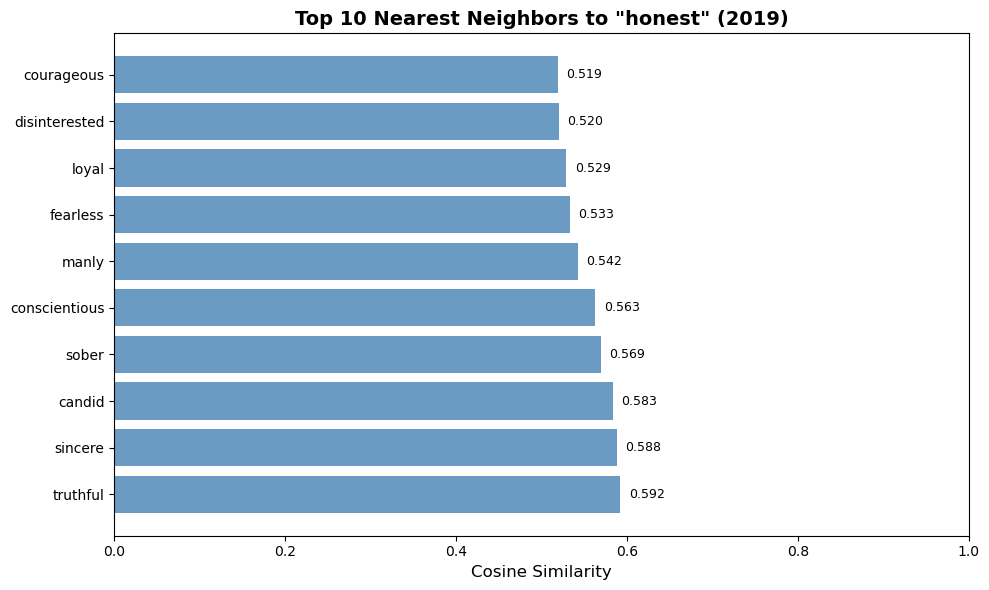


Nearest neighbors:
  truthful: 0.5922
  sincere: 0.5880
  candid: 0.5832
  sober: 0.5691
  conscientious: 0.5628
  manly: 0.5422
  fearless: 0.5327
  loyal: 0.5288
  disinterested: 0.5202
  courageous: 0.5193


In [174]:
# Example: Find the 10 nearest neighbors to 'computer' in 2019
neighbors = plot_nearest_neighbors(
    word='honest',
    year=2019,
    model_dir=model_path,
    n=10
)

# The function also returns the neighbors as a list
print("\nNearest neighbors:")
for word, similarity in neighbors:
    print(f"  {word}: {similarity:.4f}")